**Q1. What is the relationship between polynomial functions and kernel functions in machine learning
algorithms?**

Ans: A kernel function is a mathematical function that computes the similarity between two data points in a higher-dimensional space wihtout explicitly transforming them. It helps convert a non-linearly separable problem into a linearly separable one.

A polynomial function is a function where n is the degree of the polynomial. Polynomial functions can capture more complex pattern than linear models.

A polynomial kernel function is a type of kernel function that implicitly maps input features into a higher-dimensional space using polynomial functions.

**Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?**

**Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?**

Ans: 

**Larger: Fewer Support Vectors**
- A larger epsilon means that more data points fall within the margin where errors are ignored.
- These points do no become support vectors since they are within the tolerance range.
- This results in simpler models with fewer support vectors.

**Smaller: More Support Vectors**
- A smaller epsilon means the model becomes more sensitive to small deviations.
- More points will lie outside the margin, becoming support vectors.
- This results in a more complex model.

**Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter
affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works
and provide examples of when you might want to increase or decrease its value?**

Ans:
 
**Impact of Kernel Function, C, Epsilon, and Gamma on Support Vector Regression(SVR)**

SVR(Support Vector Regression) is a powerful model that can be fine-tuned using multiple hyperparameters. Here's how each parameter affects performance and when you should adjust them.

**Kernel Function**
The kernel function transforms data into a higher-dimensional space, allowing SVR to handle non-linear relationships.

- _Common Kernel Choices:_
    - Linear (kernel='linear'): Suitable for simple relationships between features.
    - Polynomial (kernel='poly'): Useful when data follows a curved relationship.
    - Radial Basis Function (RBF) (kernel='rbf'): The most commonly used; good for complex patterns.
    - Sigmoid (kernel='sigmoid'): Similar to neural networks; used less frequently.

- _When to Increase Kernel Complexity?_
    - If data is non-linearly distributed, use RBF or polynomial kernels.
    - If a simple linear model isn't capturing the relationship, try a higher-degree polynomial kernel.

- _When to Keep It Simple?_
    - If the dataset is small and noise-free,, use a linear kernel to prevent overfitting.

**Regularization Parameter**
C controls the trade off between fitting the training data and keeping the model simple.
- _Small C(e.g., 0.1): More margin, less overfitiing:_
    - The model allows more errors and generalizes better.
    - Suitable when data is noisy.

- _Large C(e.g., 100)-> Less maargin, more overfitting:_
    - The model tries to fit training data exactly.
    - Useful when you want high accuracy on training data.

**Epsilon**
Epsilon defines a margin of tolerance where errors are ignored.

- _Small epsilon(e.g., 0.01): High sensitivity, more support vectors:_
    - The model tries to fit as many points as possible inside the margin.
    - Useful when high precision is needed.

- _Large epsilon(e.g., 0.5): More tolerance, fewer support vectors:_
    - The model ignores small errors.
    - Useful when you want a smooth function with less complexity.
    
**Gamma**
Gamma controls how much influence a single training example has on the model.

- _Small gamma(e.g., 0.01)-> Wider decision boundary, more generalization_
    - Model considers distant points, leading to a smoother function.
- _Large gamma(e.g., 10)-> Narrow decision boundary, more overfitting_
    - Model focuses only on nearby points, which can overfit.



**Q5. Assignment:**
-  Import the necessary libraries and load the dataseg
- Split the dataset into training and testing setZ
L Preprocess the data using any technique of your choice (e.g. scaling, normalizationK
- Create an instance of the SVC classifier and train it on the training datW
- Use the trained classifier to predict the labels of the testing datW
- Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,
precision, recall, F1-scoreK
- Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomizedSearchCV to
improve its performanc_
- Train the tuned classifier on the entire dataseg
- Save the trained classifier to a file for future use.

In [4]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import string

In [2]:
from sklearn.datasets import load_wine

In [5]:
wine_dataset=load_wine()
wine_dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [6]:
type(wine_dataset)

sklearn.utils._bunch.Bunch

In [7]:
df_data = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)

Displaying the shape of the Data

In [9]:
display(df_data.shape)
" Displaying the head values "
display(df_data.head())
" Displaying the tail values "
display(df_data.tail())

(178, 13)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


In [10]:
df_data['target']=pd.Series(wine_dataset.target)

In [11]:
df_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [13]:
df_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [14]:
def display_file_info(df,df_name):
    col_name_list = list(df.columns)
    col_data_type = [type(col) for col in df.iloc[0,:]]
    null_count_list = [df[col].isnull().sum() for col in col_name_list]
    unique_count_list = [df[col].nunique() for col in col_name_list]
    memory_usage_list = [df[col].memory_usage() for col in col_name_list]
    total_memory_usage = sum(memory_usage_list)
    df_info=pd.DataFrame({'column_name': col_name_list,
                            'column_type':col_data_type,
                            'null_count':null_count_list,
                            'unique_count':unique_count_list})
    print('---------{} Summary----{} x rows | {} x cols | approx{:.2f} MB:'.format(df_name, df.shape[0], df.shape[1], total_memory_usage))
    print(df_info.to_string())

display_file_info(df_data,'Input Data (WineDataset)')

---------Input Data (WineDataset) Summary----178 x rows | 14 x cols | approx21072.00 MB:
                     column_name      column_type  null_count  unique_count
0                        alcohol  <class 'float'>           0           126
1                     malic_acid  <class 'float'>           0           133
2                            ash  <class 'float'>           0            79
3              alcalinity_of_ash  <class 'float'>           0            63
4                      magnesium  <class 'float'>           0            53
5                  total_phenols  <class 'float'>           0            97
6                     flavanoids  <class 'float'>           0           132
7           nonflavanoid_phenols  <class 'float'>           0            39
8                proanthocyanins  <class 'float'>           0           101
9                color_intensity  <class 'float'>           0           132
10                           hue  <class 'float'>           0            78

# Data Visualization

In [16]:
predict_class_count = df_data.target.value_counts()
display(predict_class_count)

target
1    71
0    59
2    48
Name: count, dtype: int64

In [17]:
from plotly.offline import iplot
pred_class = ['class_0', 'class_1', 'class_2']
trace = go.Pie(labels = pred_class, values = predict_class_count)
data=[trace]
fig=go.Figure(data=trace)
iplot(fig)

<Axes: >

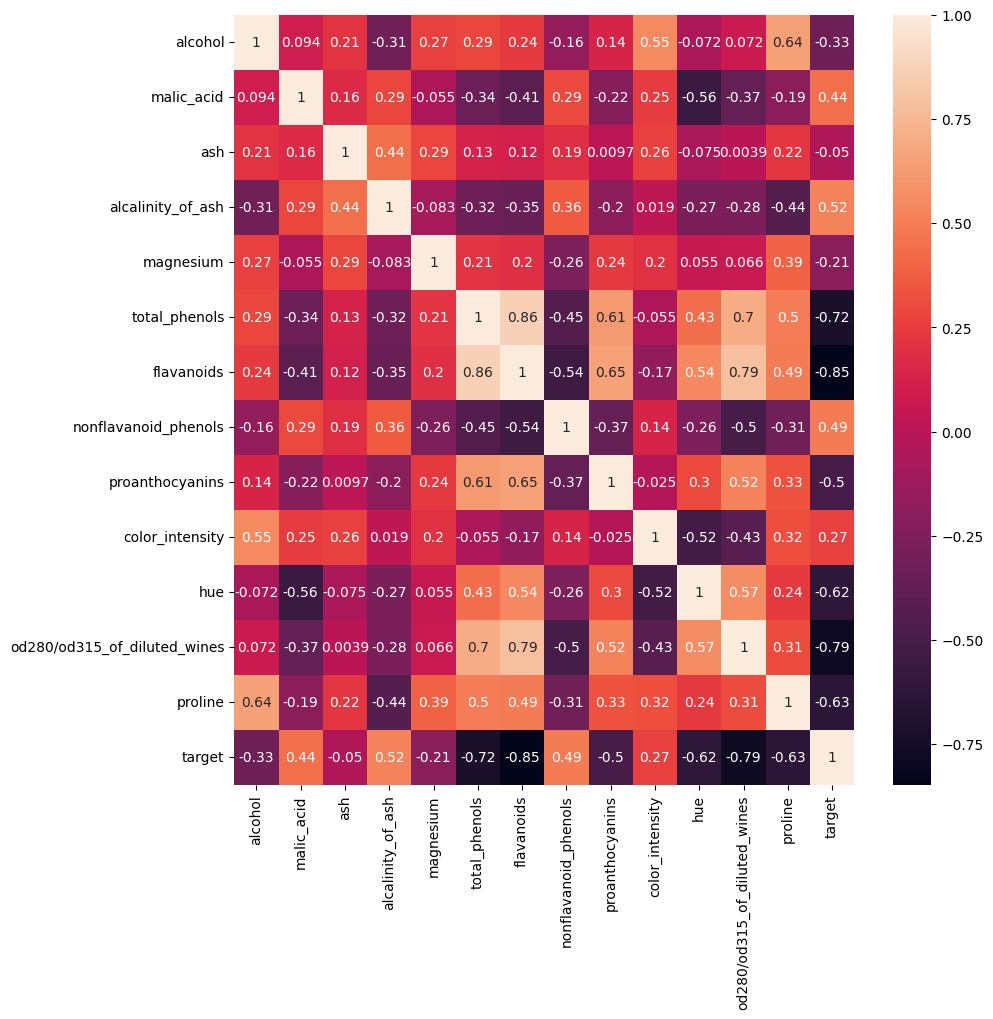

In [18]:
plt.figure(figsize=(10,10))
# sns.heatmap(df.corr(),annot=True,annot_kws={'size':15})
sns.heatmap(df_data.corr(),annot=True,annot_kws={'size':10})

<Axes: xlabel='alcohol'>

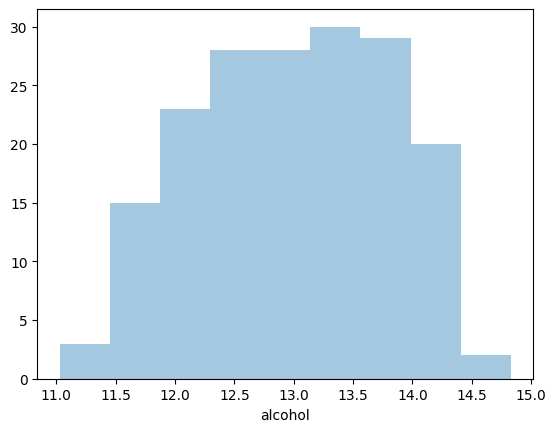

In [19]:
 sns.distplot(df_data['alcohol'],kde=0)

## Distribution of alcohol content with respect to target class

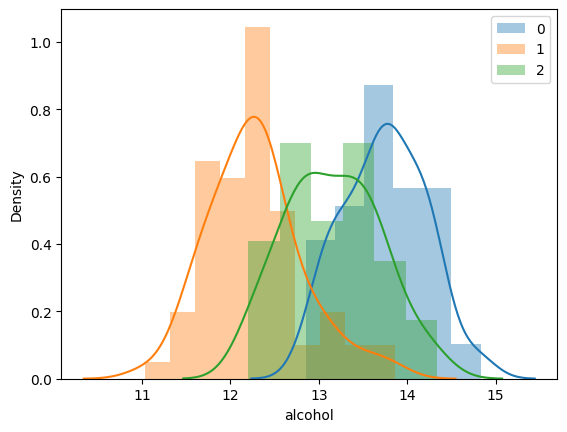

In [21]:
for i in df_data.target.unique():
    sns.distplot(df_data['alcohol'][df_data.target==i], kde=1,label='{}'.format(i))
plt.legend()

## Callling Sklearn library for Traintest split, classifier

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.model_selection import cross_validate as CV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

In [23]:
Xa_1= df_data.iloc[:,:-1].values
Target_Class = df_data.iloc[:,-1].values

In [24]:
XX = df_data.iloc[:,:-1]
YY =df_data.iloc[:,-1]

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XX[XX.columns]=scaler.fit_transform(XX[XX.columns])

## data split for training & testing

In [27]:
X_train, X_test, y_train, y_test = train_test_split(XX, YY, random_state=0, test_size=0.25, stratify=Target_Class)
display("for training")
print(X_train.shape, y_train.shape)
display("for testing")
print(X_test.shape, y_test.shape)

'for training'

(133, 13) (133,)


'for testing'

(45, 13) (45,)


In [28]:
## creating an empty list to save the results (classifier)
classifier = SVC(kernel = 'rbf', random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [29]:
y_pred=classifier.predict(X_test)

<Axes: >

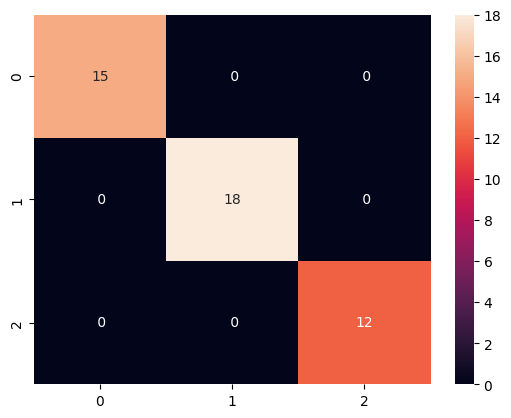

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [31]:
#k-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracy_level = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv=10)
display(accuracy_level.mean())

0.9780219780219781

## Hyper Tunning based on GridSearch CV

In [32]:
#Grid search cv
parameters = [{'C': [1,10,100,250,500,1000], 'kernel': ['linear']},
            {'C': [1,10,100,250,500,1000], 'kernel' : ['rbf'],
            'gamma': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search =GSCV(estimator = classifier,
                    param_grid = parameters,
                    scoring = 'accuracy',
                    cv = 10) 
grid_search.fit(X_train,y_train)           
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_accuracy

0.9780219780219781

In [33]:
best_parameters

{'C': 1, 'gamma': 0.05, 'kernel': 'rbf'}

In [34]:
# Fitting Kernel SVM to the Training set with best parameters
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma = 0.9)
classifier.fit(X_train,y_train)

#Predicting the Test set
y_pred = classifier.predict(X_test)

<Axes: >

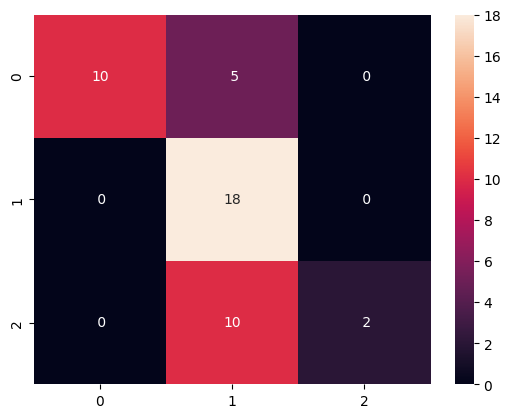

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')